In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
X = np.linspace(0, 50, 501)

In [4]:
y = np.sin(X)

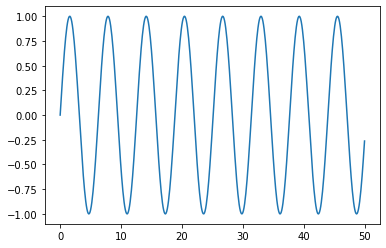

In [6]:
plt.plot(X,y)

In [7]:
df = pd.DataFrame(data=y, index=X, columns=['sine'])

In [9]:
df.shape

(501, 1)

In [10]:
test_percent = 0.1

In [11]:
len(df)* test_percent

50.1

In [12]:
test_point = np.round(len(df)* test_percent)

In [13]:
test_int = int(len(df) - test_point)
test_int

451

In [14]:
train = df.iloc[:test_int]
test = df.iloc[test_int:]

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)

In [20]:
scaled_test = scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
# TimeseriesGenerator?

In [24]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [25]:
len(scaled_train)

451

In [27]:
len(generator)  ## len of scaled_train- length

449

In [29]:
X,y = generator[0]

In [31]:
X,y  #3 given the 1st two point try to predict y (3rd point from our dataset)

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [34]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [36]:
n_features = 1

In [65]:

model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit_generator(generator, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 48s 119ms/step - loss: 0.0208
Epoch 2/5
401/401 [==============================] - 47s 117ms/step - loss: 1.3635e-041s - 
Epoch 3/5
401/401 [==============================] - 38s 96ms/step - loss: 2.5678e-04
Epoch 4/5
401/401 [==============================] - 48s 121ms/step - loss: 0.0015
Epoch 5/5
401/401 [==============================] - 49s 123ms/step - loss: 3.5776e-05


In [41]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

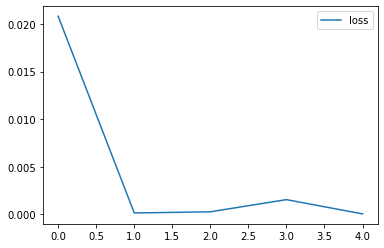

In [42]:
losses.plot()

In [43]:
first_eval_batch = scaled_train[-length:]

In [45]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [46]:
model.predict(first_eval_batch)

array([[0.9464842]], dtype=float32)

In [47]:
scaled_test[0]

array([0.94955134])

In [49]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [51]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [52]:
# np.append(current_batch[:,1:,:], [[[99]]])

In [53]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [54]:
test_predictions

[array([0.9464842], dtype=float32),
 array([0.96678245], dtype=float32),
 array([0.9790777], dtype=float32),
 array([0.98709214], dtype=float32),
 array([0.9901321], dtype=float32),
 array([0.987193], dtype=float32),
 array([0.98085034], dtype=float32),
 array([0.96768546], dtype=float32),
 array([0.95210624], dtype=float32),
 array([0.9305589], dtype=float32),
 array([0.9052273], dtype=float32),
 array([0.87656283], dtype=float32),
 array([0.8429711], dtype=float32),
 array([0.8070804], dtype=float32),
 array([0.7672912], dtype=float32),
 array([0.7247187], dtype=float32),
 array([0.68011904], dtype=float32),
 array([0.6328933], dtype=float32),
 array([0.5839939], dtype=float32),
 array([0.5343324], dtype=float32),
 array([0.4827494], dtype=float32),
 array([0.43205574], dtype=float32),
 array([0.3805427], dtype=float32),
 array([0.33037546], dtype=float32),
 array([0.2817449], dtype=float32),
 array([0.23386209], dtype=float32),
 array([0.19137955], dtype=float32),
 array([0.14832519

In [55]:
true_prediction = scaler.inverse_transform(test_predictions)

In [56]:
true_prediction

array([[ 0.89296302],
       [ 0.93355918],
       [ 0.95814947],
       [ 0.97417822],
       [ 0.98025809],
       [ 0.97437993],
       [ 0.96169473],
       [ 0.93536518],
       [ 0.90420699],
       [ 0.8611127 ],
       [ 0.81044987],
       [ 0.75312139],
       [ 0.68593844],
       [ 0.61415762],
       [ 0.53457985],
       [ 0.44943554],
       [ 0.36023695],
       [ 0.26578628],
       [ 0.16798824],
       [ 0.06866601],
       [-0.03449915],
       [-0.13588566],
       [-0.23891092],
       [-0.33924458],
       [-0.43650493],
       [-0.53226979],
       [-0.61723418],
       [-0.70334221],
       [-0.77553857],
       [-0.84296191],
       [-0.90270937],
       [-0.94904472],
       [-0.99268895],
       [-1.01856751],
       [-1.04301398],
       [-1.05070902],
       [-1.0519145 ],
       [-1.04333156],
       [-1.02249645],
       [-0.9948717 ],
       [-0.95614891],
       [-0.90969751],
       [-0.85265239],
       [-0.79236027],
       [-0.71551782],
       [-0

In [58]:
test['predictions'] = true_prediction

<ipython-input-58-90bfd4fe3390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_prediction


In [59]:
test

,sine,predictions
45.1,0.899097,0.892963
45.2,0.938307,0.933559
45.3,0.968142,0.958149
45.4,0.988304,0.974178
45.5,0.998591,0.980258
45.6,0.998900,0.974380
45.7,0.989229,0.961695
45.8,0.969673,0.935365
45.9,0.940429,0.904207
46.0,0.901788,0.861113


<AxesSubplot:>

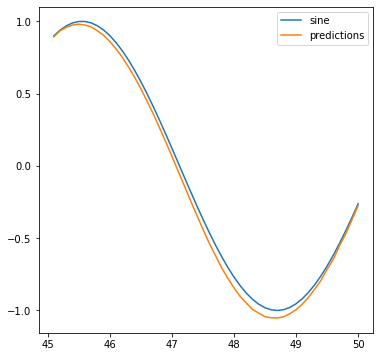

In [60]:
test.plot(figsize=(6,6))

## using LSTM

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [63]:

validation_gen = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

ValueError: `start_index+length=50 > end_index=49` is disallowed, as no part of the sequence would be left to be used as current step.

In [64]:
#3scaled test data length should be greater than the length of the bathces
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_gen = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [67]:

model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [68]:
model.fit_generator(generator, epochs=20, validation_data=validation_gen,  callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 5s 14ms/step - loss: 0.0114 - val_loss: 1.6308e-04
Epoch 2/20
402/402 [==============================] - 6s 14ms/step - loss: 4.8462e-04 - val_loss: 6.7357e-05
Epoch 3/20
402/402 [==============================] - 5s 14ms/step - loss: 1.1262e-04 - val_loss: 7.2538e-07
Epoch 4/20
402/402 [==============================] - 6s 14ms/step - loss: 6.6689e-05 - val_loss: 3.0791e-05loss: 6.5365e
Epoch 5/20
402/402 [==============================] - 5s 13ms/step - loss: 0.0011 - val_loss: 4.4186e-05


In [69]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

<ipython-input-71-0bbf8a44dcb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lstm predictions'] = true_prediction


<AxesSubplot:>

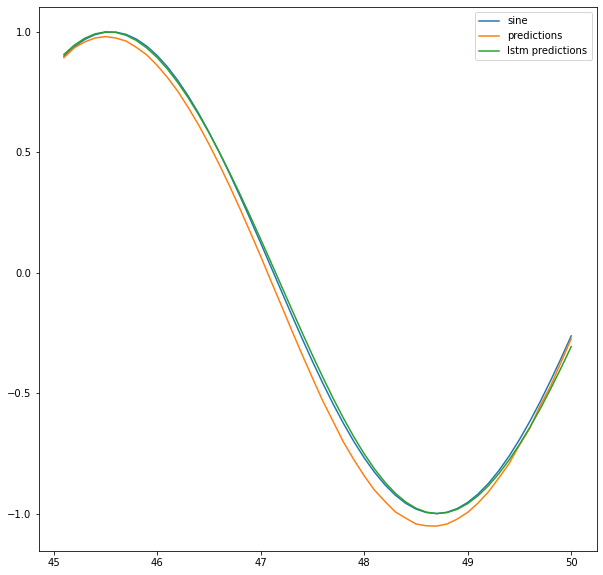

In [71]:
true_prediction = scaler.inverse_transform(test_predictions)
test['lstm predictions'] = true_prediction
test.plot(figsize=(10,10))

<AxesSubplot:>

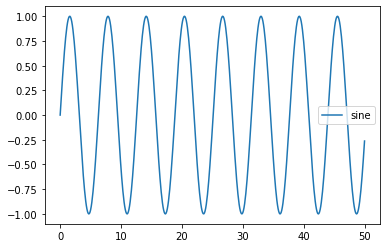

In [72]:
df.plot()

In [73]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [76]:
length = 50
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM


model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [78]:
model.fit_generator(generator, epochs=6)

Epoch 1/6
451/451 [==============================] - 5s 11ms/step - loss: 0.0236
Epoch 2/6
451/451 [==============================] - 4s 10ms/step - loss: 1.0463e-04
Epoch 3/6
451/451 [==============================] - 5s 11ms/step - loss: 6.6538e-05
Epoch 4/6
451/451 [==============================] - 4s 9ms/step - loss: 3.1756e-04
Epoch 5/6
451/451 [==============================] - 7s 15ms/step - loss: 9.8528e-05
Epoch 6/6
451/451 [==============================] - 6s 13ms/step - loss: 7.5920e-05


In [79]:
forcast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    
    forcast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [81]:
forcast = scaler.inverse_transform(forcast)

In [82]:
forcast

array([[ 0.89519579],
       [ 0.93148698],
       [ 0.95737009],
       [ 0.97258369],
       [ 0.97700012],
       [ 0.97063845],
       [ 0.95365639],
       [ 0.92633873],
       [ 0.88908052],
       [ 0.84237327],
       [ 0.78678571],
       [ 0.72295191],
       [ 0.65155935],
       [ 0.57333866],
       [ 0.48906051],
       [ 0.39952945],
       [ 0.30558339],
       [ 0.20809231],
       [ 0.10795803],
       [ 0.00611298],
       [-0.09648289],
       [-0.19884381],
       [-0.29996317],
       [-0.39882008],
       [-0.49438416]])

In [84]:
forcast_index = np.arange(50.1,52.6, step=0.1)

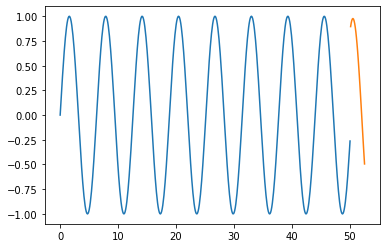

In [85]:
plt.plot(df.index, df['sine'])
plt.plot(forcast_index, forcast)